### MSc Computer Science, Data Science @UniPD
### Optimization Methods for Data Science
### Prof. Francesco Rinaldi
---

In [70]:
# Fix states
sklearn_random_state = 42

# Data preparation

In [100]:
class DataProperties:
    n_samples = 1000
    labeled_percentage = 0.01
    n_dims = 2
    n_clusters = 2

    unlabeled = -1000000  # To mark the unlabelled data instance

In [101]:
from sklearn.datasets import make_blobs
import numpy as np

# Plotting
import matplotlib.pyplot as plt

In [102]:
X, Y = make_blobs(
    n_samples = DataProperties.n_samples,
    centers = DataProperties.n_clusters,
    n_features = DataProperties.n_dims,
    random_state = sklearn_random_state
)
clusters = np.unique(Y)

print(f'Data shape: X: {X.shape}, Y: {Y.shape}')

Data shape: X: (1000, 2), Y: (1000,)


## Visualize fully labeled data

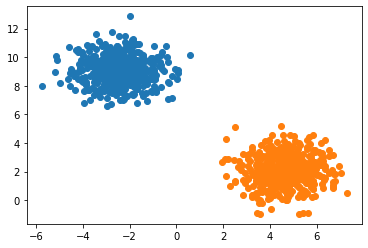

In [103]:
fig, ax = plt.subplots()
# cluster_colors = ['red', 'blue', '']

for cluster in clusters:
    mask = Y == cluster
    subset = X[mask]
    ax.scatter(
        subset[:, 0],
        subset[:, 1], 
        marker = 'o',
        # color = cluster_colors[cluster_id]
    )
    ax.grid()

## Unlabel subset and visualize

In [104]:
def delabel_data (labeled_data, labeled_percent, delabel_value):
    res = np.ndarray.copy(labeled_data)
    clusters_ids = np.unique(labeled_data)

    for cluster_id in clusters_ids:
        # find indices of object, labeled as cluster_id
        # we keep 'labeled_percent' points still labeled

        cluster_indices = np.where(labeled_data == cluster_id)[0]
        print(f'Found {len(cluster_indices)} instances of object {cluster_id}')

        n_to_delabel = int(len(cluster_indices) * (1 - labeled_percent))
        print(f'We have to delabel {n_to_delabel} instances')

        # we choose data to delabel randomly
        indices_to_delabel = np.random.choice(
            len(cluster_indices - 1),
            n_to_delabel,
            replace = False
        )

        assert len(indices_to_delabel) == n_to_delabel, print(len(indices_to_delabel))
        assert np.max(indices_to_delabel) < len(res)
        assert np.max(indices_to_delabel) <= np.max(cluster_indices)


        print(res.shape)
        a = 2
        res[
            cluster_indices[indices_to_delabel]
        ] = delabel_value
    return res

In [105]:
Y_delabeled = delabel_data(
    Y,
    labeled_percent = DataProperties.labeled_percentage,
    delabel_value = DataProperties.unlabeled
)

assert(
    len(Y_delabeled[Y_delabeled == DataProperties.unlabeled]) == int(len(Y) * (1 - DataProperties.labeled_percentage))
)

print(
    f'''
    We have {len(Y_delabeled[Y_delabeled == DataProperties.unlabeled])} unlabeled data
    Out of {len(Y_delabeled)}
    '''
)

Found 500 instances of object 0
We have to delabel 495 instances
(1000,)
Found 500 instances of object 1
We have to delabel 495 instances
(1000,)

    We have 990 unlabeled data
    Out of 1000
    


## Visualize data after delabelling

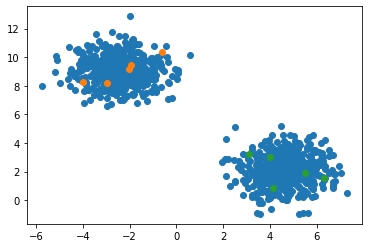

In [106]:
fig, ax = plt.subplots()

clusters = np.unique(Y_delabeled)
for c in clusters:
    mask = Y_delabeled == c
    subset = X[mask]
    ax.scatter(
        subset[:, 0],
        subset[:, 1], 
        marker = 'o'
    )